In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")
df.head()

,CYCLONE,SEASON,LOCATION,STAGES,SEA_TEMPERATURE,RIDGES,WIND_SHEAR_KNOTS,MJO,DIRECTION
0,NIVAR,0,BAY OF BENGAL,1,27,0,40,0,0
1,NIVAR,0,BAY OF BENGAL,1,28,0,35,0,0
2,NIVAR,0,BAY OF BENGAL,1,28,0,30,0,0
3,NIVAR,0,BAY OF BENGAL,0,28,0,30,0,0
4,NIVAR,0,BAY OF BENGAL,0,28,0,29,0,0


In [3]:
df.tail()

,CYCLONE,SEASON,LOCATION,STAGES,SEA_TEMPERATURE,RIDGES,WIND_SHEAR_KNOTS,MJO,DIRECTION
191,AMPHAN,1,BAY OF BENGAL,5,30,1,6,1,4
192,AMPHAN,1,BAY OF BENGAL,5,29,1,7,1,4
193,AMPHAN,1,BAY OF BENGAL,4,31,1,5,1,4
194,AMPHAN,1,BAY OF BENGAL,4,31,1,6,1,4
195,AMPHAN,1,BAY OF BENGAL,4,31,1,6,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CYCLONE           196 non-null    object
 1   SEASON            196 non-null    int64 
 2   LOCATION          196 non-null    object
 3   STAGES            196 non-null    int64 
 4   SEA_TEMPERATURE   196 non-null    int64 
 5   RIDGES            196 non-null    int64 
 6   WIND_SHEAR_KNOTS  196 non-null    int64 
 7   MJO               196 non-null    int64 
 8   DIRECTION         196 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 13.9+ KB


In [5]:
df.isnull().sum()

CYCLONE             0
SEASON              0
LOCATION            0
STAGES              0
SEA_TEMPERATURE     0
RIDGES              0
WIND_SHEAR_KNOTS    0
MJO                 0
DIRECTION           0
dtype: int64

In [6]:
df = df.drop(['CYCLONE'], axis = 1) 
df = df.drop(['LOCATION'], axis = 1)

In [7]:
df.head()

,SEASON,STAGES,SEA_TEMPERATURE,RIDGES,WIND_SHEAR_KNOTS,MJO,DIRECTION
0,0,1,27,0,40,0,0
1,0,1,28,0,35,0,0
2,0,1,28,0,30,0,0
3,0,0,28,0,30,0,0
4,0,0,28,0,29,0,0


In [8]:
df.describe()

,SEASON,STAGES,SEA_TEMPERATURE,RIDGES,WIND_SHEAR_KNOTS,MJO,DIRECTION
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.255102,2.913265,28.622449,1.204082,20.775510,0.510204,1.107143
std,0.437035,1.986526,1.403405,0.783931,12.362914,0.501176,1.375146
min,0.000000,0.000000,25.000000,0.000000,5.000000,0.000000,0.000000
25%,0.000000,1.000000,28.000000,1.000000,9.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,1.000000,18.000000,1.000000,0.500000
75%,1.000000,5.000000,30.000000,2.000000,30.000000,1.000000,2.000000
max,1.000000,6.000000,31.000000,2.000000,46.000000,1.000000,4.000000


In [9]:
import matplotlib.pyplot as plt

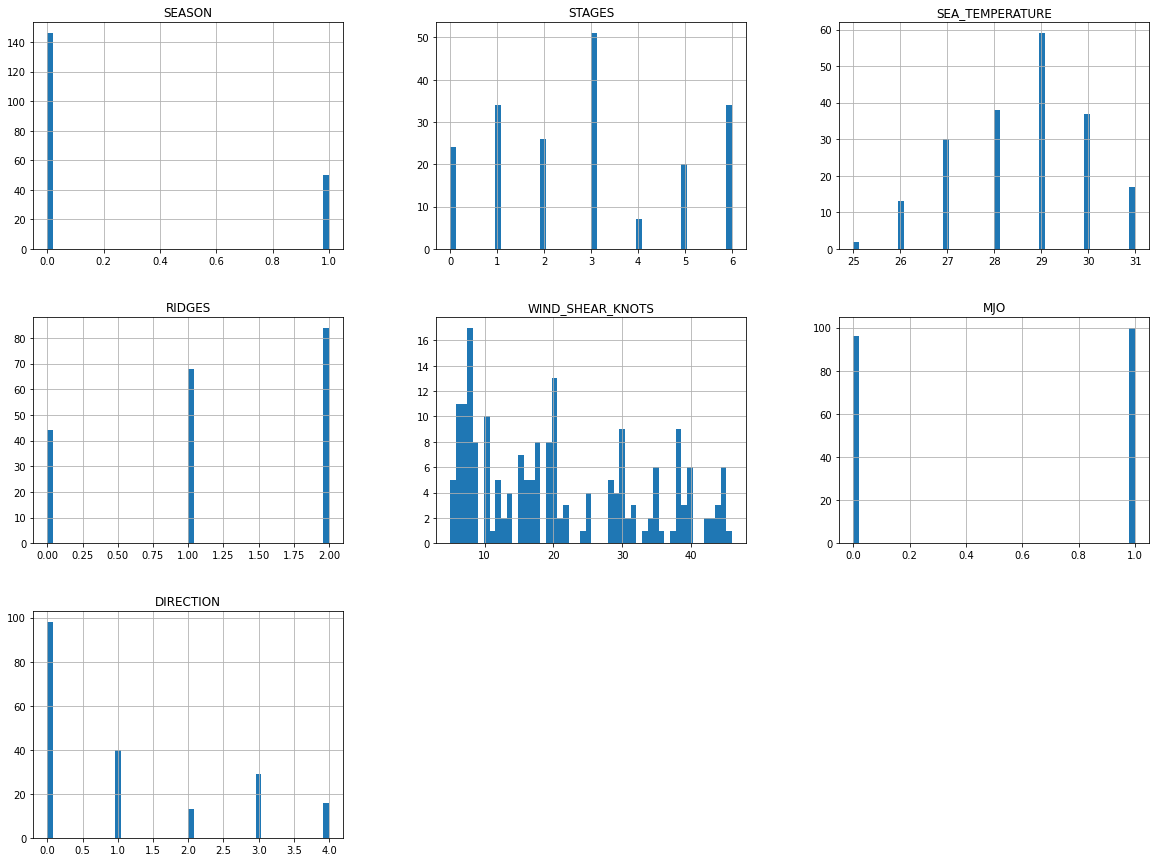

In [10]:
df.hist(bins=50 , figsize=(20,15))
plt.show()

In [11]:
corr_matrix = df.corr()

corr_matrix['DIRECTION'].sort_values(ascending = False)

DIRECTION           1.000000
STAGES              0.639808
RIDGES              0.393477
SEA_TEMPERATURE     0.246935
MJO                 0.076535
SEASON              0.073749
WIND_SHEAR_KNOTS   -0.591612
Name: DIRECTION, dtype: float64

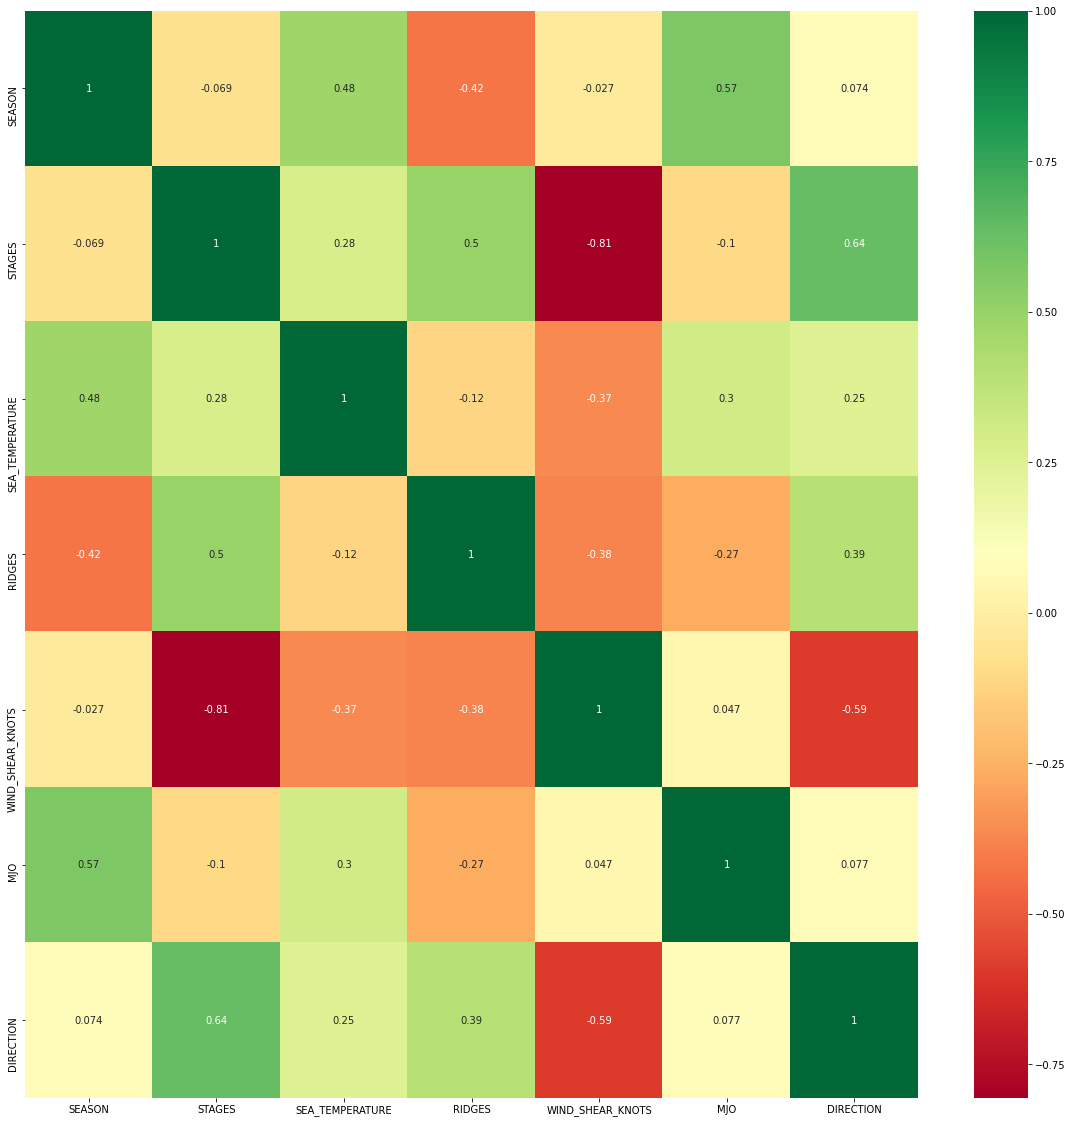

In [12]:
import seaborn as sns

plt.figure(figsize=(20,20))

g=sns.heatmap(corr_matrix,annot=True,cmap="RdYlGn")

array([[<AxesSubplot:xlabel='DIRECTION', ylabel='DIRECTION'>,
        <AxesSubplot:xlabel='STAGES', ylabel='DIRECTION'>,
        <AxesSubplot:xlabel='WIND_SHEAR_KNOTS', ylabel='DIRECTION'>],
       [<AxesSubplot:xlabel='DIRECTION', ylabel='STAGES'>,
        <AxesSubplot:xlabel='STAGES', ylabel='STAGES'>,
        <AxesSubplot:xlabel='WIND_SHEAR_KNOTS', ylabel='STAGES'>],
       [<AxesSubplot:xlabel='DIRECTION', ylabel='WIND_SHEAR_KNOTS'>,
        <AxesSubplot:xlabel='STAGES', ylabel='WIND_SHEAR_KNOTS'>,
        <AxesSubplot:xlabel='WIND_SHEAR_KNOTS', ylabel='WIND_SHEAR_KNOTS'>]],
      dtype=object)

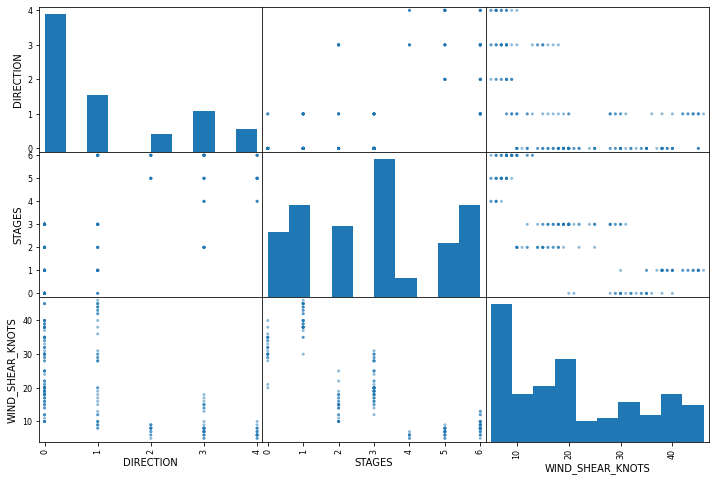

In [13]:
from pandas.plotting import scatter_matrix

atr = ['DIRECTION','STAGES','WIND_SHEAR_KNOTS']
scatter_matrix(df[atr],figsize=(12,8))

In [14]:
df_features = df.drop(['DIRECTION'], axis = 1) 

In [15]:
df_label = df['DIRECTION']

In [16]:
df_features.head()

,SEASON,STAGES,SEA_TEMPERATURE,RIDGES,WIND_SHEAR_KNOTS,MJO
0,0,1,27,0,40,0
1,0,1,28,0,35,0
2,0,1,28,0,30,0
3,0,0,28,0,30,0
4,0,0,28,0,29,0


In [17]:
df_label.head()

0    0
1    0
2    0
3    0
4    0
Name: DIRECTION, dtype: int64

In [18]:
features = df_features

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [20]:
model.fit(features,df_label)

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
model.predict([[0,5,29,1,8,0]])

array([2], dtype=int64)

In [22]:
import pickle

In [23]:
pickle.dump(model,open('storm_model.pkl','wb'))